In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns
import plotly.graph_objs as go
import datetime

In [10]:
csvpath = "Resources/train_data.csv"
df = pd.read_csv(csvpath, low_memory=False)
df.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682154 entries, 0 to 682153
Data columns (total 49 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   GameId                  682154 non-null  int64  
 1   PlayId                  682154 non-null  int64  
 2   Team                    682154 non-null  object 
 3   X                       682154 non-null  float64
 4   Y                       682154 non-null  float64
 5   S                       682154 non-null  float64
 6   A                       682154 non-null  float64
 7   Dis                     682154 non-null  float64
 8   Orientation             682131 non-null  float64
 9   Dir                     682126 non-null  float64
 10  NflId                   682154 non-null  int64  
 11  DisplayName             682154 non-null  object 
 12  JerseyNumber            682154 non-null  int64  
 13  Season                  682154 non-null  int64  
 14  YardLine            

In [7]:
df.describe()

,GameId,PlayId,X,Y,S,A,Dis,Orientation,Dir,NflId,...,Distance,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,DefendersInTheBox,Yards,PlayerWeight,Week,Temperature,Humidity
count,6.821540e+05,6.821540e+05,682154.000000,682154.000000,682154.000000,682154.000000,682154.000000,682131.000000,682126.000000,6.821540e+05,...,682154.000000,682154.000000,682154.000000,6.821540e+05,682132.000000,682154.000000,682154.000000,682154.000000,618508.000000,675994.000000
mean,2.017975e+09,2.017975e+13,60.036863,26.791456,2.634598,1.701739,0.278193,179.996742,180.040620,2.369743e+06,...,8.319154,11.047989,9.762570,2.446079e+06,6.910340,4.227626,253.414628,8.401587,62.010066,54.741563
std,7.844593e+05,7.844593e+09,25.499310,7.192919,1.404773,0.991380,0.145218,102.794554,106.189491,6.053648e+05,...,3.818716,10.095556,9.532945,4.833287e+05,0.985065,6.449866,48.469869,4.808791,17.071117,25.146693
min,2.017091e+09,2.017091e+13,0.660000,1.850000,0.000000,0.000000,0.000000,0.000000,0.000000,2.220000e+02,...,1.000000,0.000000,0.000000,2.340000e+02,2.000000,-15.000000,153.000000,1.000000,9.000000,0.000000
25%,2.017113e+09,2.017113e+13,39.080000,22.760000,1.520000,0.950000,0.160000,90.060000,90.150000,2.532989e+06,...,6.000000,3.000000,0.000000,2.540269e+06,6.000000,1.000000,210.000000,4.000000,50.000000,43.000000
50%,2.018101e+09,2.018101e+13,60.230000,26.800000,2.510000,1.550000,0.270000,179.640000,180.180000,2.550541e+06,...,10.000000,10.000000,7.000000,2.555224e+06,7.000000,3.000000,245.000000,8.000000,64.000000,59.000000
75%,2.019091e+09,2.019091e+13,80.990000,30.850000,3.620000,2.310000,0.390000,269.780000,270.260000,2.556445e+06,...,10.000000,17.000000,16.000000,2.558116e+06,7.000000,6.000000,305.000000,12.000000,75.000000,71.000000
max,2.019112e+09,2.019113e+13,117.650000,56.450000,9.410000,14.710000,1.390000,360.000000,360.000000,2.563364e+06,...,40.000000,57.000000,59.000000,2.563327e+06,11.000000,99.000000,380.000000,17.000000,97.000000,100.000000


# Heatmap

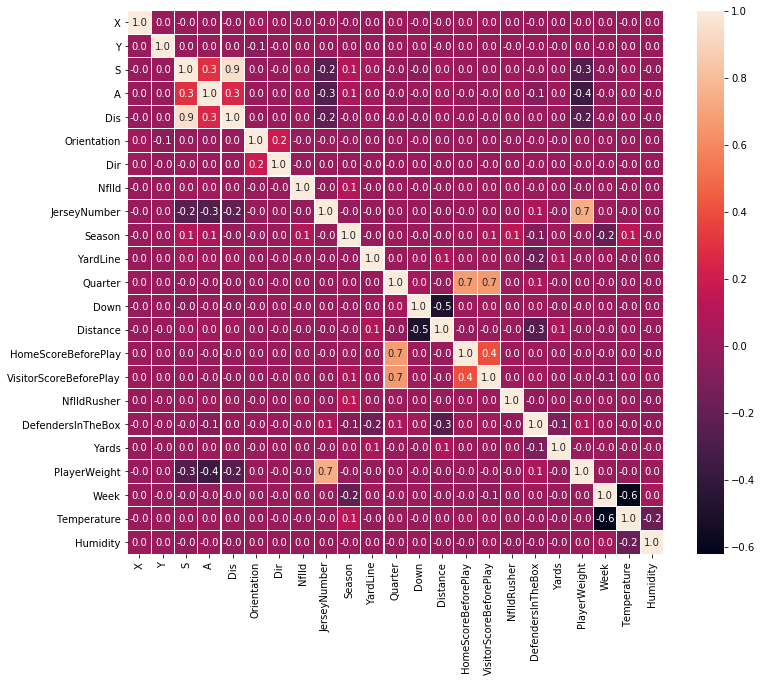

In [8]:
correlation = plt.subplots(figsize=(12,10))
sns.heatmap(df.iloc[:,2:].corr(),annot=True, linewidths=.1, fmt='.1f')

plt.show()

# Weight/Height Correlation

In [156]:
fig = go.Figure(data=go.Scattergl
(
    x = df_player["HeightCm"], 
    y = df_player["WeightKg"],
    mode='markers',
    text = df_player['DisplayName'],
    marker=dict(line_width=0.4),
    marker_color='rgb(0,145,119)'))

fig.update_layout(title='Weight Height Correlation', height=600, width=800)
fig.update_xaxes(title_text="Height (Cm)")
fig.update_yaxes(title_text="Weight (Kg)")

fig.show()

NameError: name 'df_player' is not defined

# Median Rush Yards in 1st, 2nd, 3th, 4th

# Week / Temperature Corr

In [12]:
season = df['Season'].unique()
season

array([2017, 2018, 2019], dtype=int64)

In [13]:
unique_plays = df.groupby('Season').agg({'PlayId': 'nunique', 'GameId': 'nunique', 'NflId':'nunique'})
unique_plays.columns = ["PlayCount","GameCount", "PlayerCount"]

print(unique_plays)

        PlayCount  GameCount  PlayerCount
Season                                   
2017        11900        256         1788
2018        11271        256         1783
2019         7836        176         1661


In [157]:
r = df.groupby("S")
r.describe()

GameId                                                          \
      count          mean           std           min           25%   
S                                                                     
0.00  201.0  2.017760e+09  7.213269e+05  2.017092e+09  2.017092e+09   
0.01  107.0  2.017462e+09  6.304777e+05  2.017091e+09  2.017102e+09   
0.02  164.0  2.017358e+09  5.669075e+05  2.017091e+09  2.017102e+09   
0.03  192.0  2.017494e+09  7.043263e+05  2.017091e+09  2.017102e+09   
0.04  189.0  2.017642e+09  7.584178e+05  2.017091e+09  2.017103e+09   
...     ...           ...           ...           ...           ...   
9.01    2.0  2.018101e+09  1.399361e+06  2.017112e+09  2.017607e+09   
9.08    1.0  2.019091e+09           NaN  2.019091e+09  2.019091e+09   
9.17    1.0  2.018102e+09           NaN  2.018102e+09  2.018102e+09   
9.33    1.0  2.018101e+09           NaN  2.018101e+09  2.018101e+09   
9.41    1.0  2.018113e+09           NaN  2.018113e+09  2.018113e+09   

                                               PlayId                ...  \
               50%           75%           max  count          mean  ...   
S                                                                    ...   
0.00  2.018091e+09  2.018102e+09  2.019111e+09  201.0  2.017760e+13  ...   
0.01  2.017113e+09  2.018091e+09  2.019112e+09  107.0  2.017462e+13  ...   
0.02  2.017112e+09  2.017122e+09  2.019112e+09  164.0  2.017358e+13  ...   
0.03  2.017120e+09  2.018091e+09  2.019112e+09  192.0  2.017494e+13  ...   
0.04  2.017122e+09  2.018110e+09  2.019112e+09  189.0  2.017642e+13  ...   
...            ...           ...           ...    ...           ...  ...   
9.01  2.018101e+09  2.018596e+09  2.019091e+09    2.0  2.018101e+13  ...   
9.08  2.019091e+09  2.019091e+09  2.019091e+09    1.0  2.019091e+13  ...   
9.17  2.018102e+09  2.018102e+09  2.018102e+09    1.0  2.018102e+13  ...   
9.33  2.018101e+09  2.018101e+09  2.018101e+09    1.0  2.018101e+13  ...   
9.41  2.018113e+09  2.018113e+09  2.018113e+09    1.0  2.018113e+13  ...   

     Temperature       Humidity                                            \
             75%   max    count          mean           std           min   
S                                                                           
0.00       84.00  93.0    201.0  5.626866e+01  2.130862e+01  0.000000e+00   
0.01       71.50  91.0    107.0  5.494393e+01  2.508169e+01  0.000000e+00   
0.02       71.25  93.0    164.0  4.900610e+01  2.620038e+01  0.000000e+00   
0.03       72.00  93.0    192.0  5.307292e+01  2.413715e+01  0.000000e+00   
0.04       73.00  93.0    189.0 -1.464027e+17  1.155838e+18 -9.223372e+18   
...          ...   ...      ...           ...           ...           ...   
9.01       65.25  68.0      2.0  5.500000e+01  1.555635e+01  4.400000e+01   
9.08       93.00  93.0      1.0  5.200000e+01           NaN  5.200000e+01   
9.17       37.00  37.0      1.0  5.500000e+01           NaN  5.500000e+01   
9.33       62.00  62.0      1.0  9.600000e+01           NaN  9.600000e+01   
9.41       74.00  74.0      1.0  5.200000e+01           NaN  5.200000e+01   

                                
       25%   50%    75%    max  
S                               
0.00  42.0  53.0  69.00   98.0  
0.01  44.0  59.0  71.00  100.0  
0.02  35.5  52.0  67.25  100.0  
0.03  42.0  56.0  69.00   96.0  
0.04  42.0  58.0  70.00   97.0  
...    ...   ...    ...    ...  
9.01  49.5  55.0  60.50   66.0  
9.08  52.0  52.0  52.00   52.0  
9.17  55.0  55.0  55.00   55.0  
9.33  96.0  96.0  96.00   96.0  
9.41  52.0  52.0  52.00   52.0  

[890 rows x 192 columns]

In [158]:
plt.figure(figsize=(20,10))
plt.hist(r.values, color="blue")
plt.title("speed in yards/second (S)", weight="bold", fontsize=20)
plt.xlabel("Speed", fontsize=16)
plt.ylabel("Count")

plt.show() 

AttributeError: 'DataFrameGroupBy' object has no attribute 'values'

<Figure size 1440x720 with 0 Axes>

In [16]:
f = df.groupby("A").Down.max()
r.describe()

count    890.000000
mean       3.556180
std        0.737621
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        4.000000
Name: Down, dtype: float64

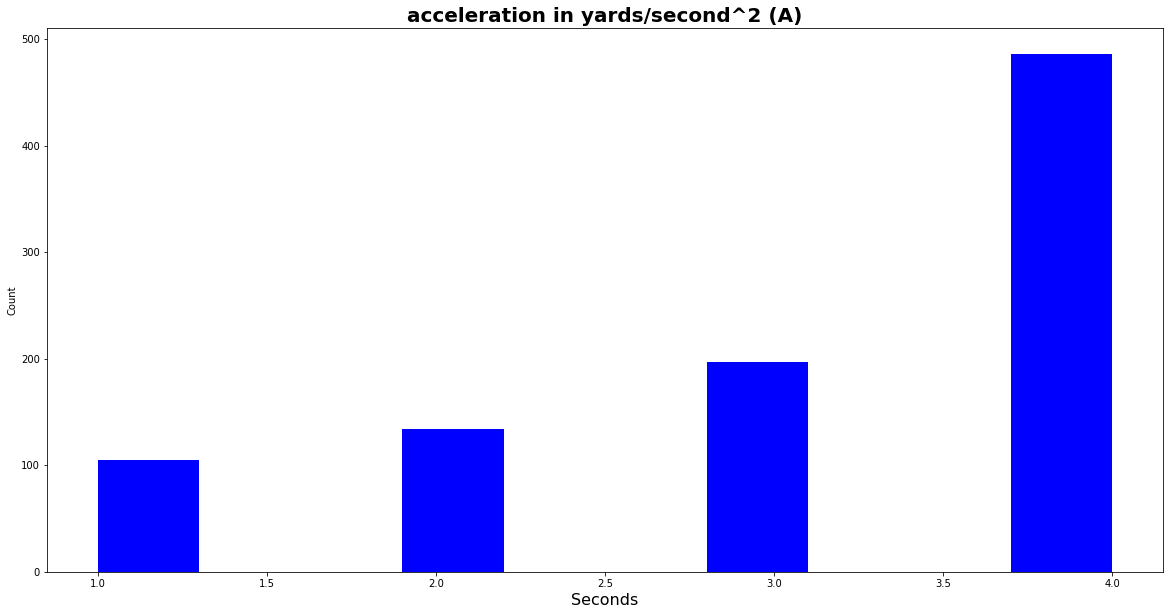

In [17]:
plt.figure(figsize=(20,10))
plt.hist(f.values, color="blue")
plt.title("acceleration in yards/second^2 (A)", weight="bold", fontsize=20)
plt.xlabel("Seconds", fontsize=16)
plt.ylabel("Count")

plt.show()

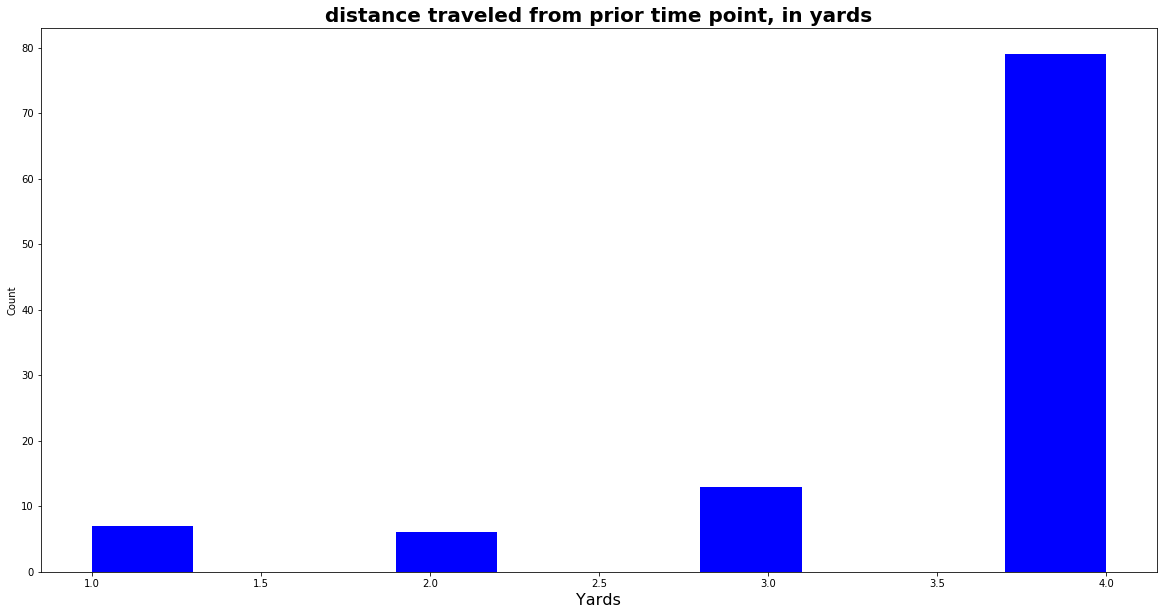

count    105.000000
mean       3.561905
std        0.876222
min        1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        4.000000
Name: Down, dtype: float64

In [18]:
e = df.groupby("Dis").Down.max()
plt.figure(figsize=(20,10))
plt.hist(e.values, color="blue")
plt.title("distance traveled from prior time point, in yards", weight="bold", fontsize=20)
plt.xlabel("Yards", fontsize=16)
plt.ylabel("Count")

plt.show()
e.describe()

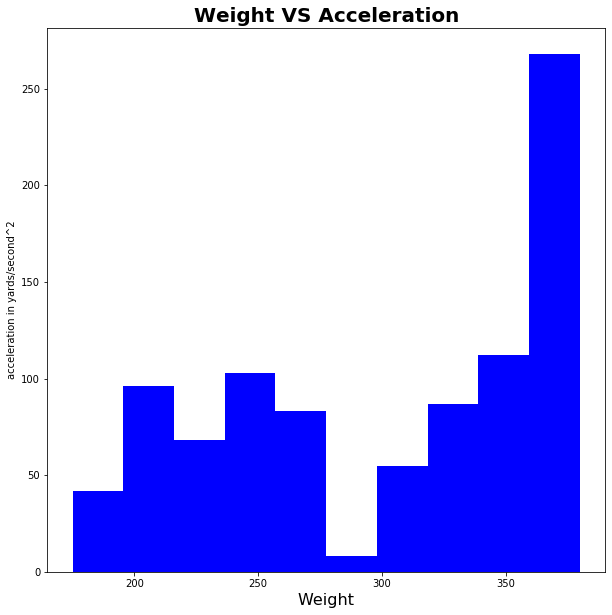

In [19]:
d = df.groupby("A").PlayerWeight.max()
plt.figure(figsize=(10,10))
plt.hist(d.values, color="blue")
plt.title("Weight VS Acceleration", weight="bold", fontsize=20)
plt.xlabel("Weight", fontsize=16)
plt.ylabel("acceleration in yards/second^2")

plt.show()

In [20]:
new_df = df[["Down", "OffenseFormation", "OffensePersonnel", "DefendersInTheBox", "DefensePersonnel", 
             "PossessionTeam", "YardLine", "HomeScoreBeforePlay", "VisitorScoreBeforePlay", "Quarter", "Yards"]]
new_df                           

,Down,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PossessionTeam,YardLine,HomeScoreBeforePlay,VisitorScoreBeforePlay,Quarter,Yards
0,3,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",NE,35,0,0,1,8
1,3,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",NE,35,0,0,1,8
2,3,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",NE,35,0,0,1,8
3,3,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",NE,35,0,0,1,8
4,3,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",NE,35,0,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...
682149,2,PISTOL,"1 RB, 1 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",BLT,38,6,45,4,4
682150,2,PISTOL,"1 RB, 1 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",BLT,38,6,45,4,4
682151,2,PISTOL,"1 RB, 1 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",BLT,38,6,45,4,4
682152,2,PISTOL,"1 RB, 1 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",BLT,38,6,45,4,4


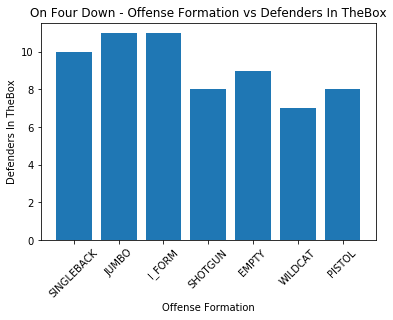

In [21]:
four = df.loc[df["Down"] == 4]

offenseFormation = four["OffenseFormation"]
defendersInTheBox = four["DefendersInTheBox"]

plt.bar(offenseFormation, defendersInTheBox)
plt.title("On Four Down - Offense Formation vs Defenders In TheBox")
plt.xlabel("Offense Formation")
plt.xticks(rotation=45)
plt.ylabel("Defenders In TheBox")

plt.show()

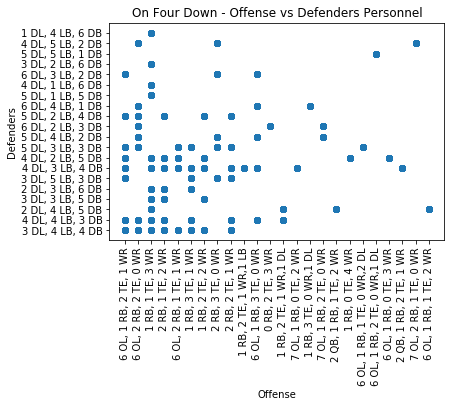

In [22]:
offensePersonnel = four["OffensePersonnel"]
defensePersonnel = four["DefensePersonnel"]

plt.scatter(offensePersonnel, defensePersonnel)
plt.title("On Four Down - Offense vs Defenders Personnel")
plt.xlabel("Offense")
plt.xticks(rotation=90)
plt.ylabel("Defenders")

plt.show()

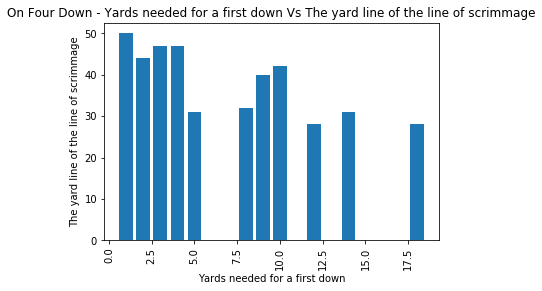

In [23]:
distance = four["Distance"]
yardLine = four["YardLine"]

plt.bar(distance, yardLine)
plt.title("On Four Down - Yards needed for a first down Vs The yard line of the line of scrimmage")
plt.xlabel("Yards needed for a first down")
plt.xticks(rotation=90)
plt.ylabel("The yard line of the line of scrimmage")

plt.show()

In [24]:
# Amount of plays by quearter
quarts = pd.DataFrame(df.groupby("PlayId").Quarter.max()).reset_index()
quarts.columns = ["PlayId", "Quarter"]

quartsCount = quarts.groupby("Quarter").count() 
quartsCount

,PlayId
Quarter,
1,7942
2,7441
3,7648
4,7779
5,197


In [25]:
s2017 = df.loc[df["Season"] == 2017]
s2018 = df.loc[df["Season"] == 2018]

In [88]:
week = df.Week.value_counts().keys()
week

Int64Index([3, 2, 4, 1, 12, 5, 7, 6, 8, 10, 11, 9, 14, 17, 15, 16, 13], dtype='int64')

In [119]:
avg_yards2017 = s2017["Distance"].mean()
avg_yards2018 = s2018["Distance"].mean() 
avg_weigt2017 = s2017["PlayerWeight"].mean()
avg_weigt2018 = s2018["PlayerWeight"].mean()

In [115]:
avg_weigt2017

8.379495798319327

In [120]:
avg_weigt2018

252.90905058033087

In [150]:
downs17 = s2017.groupby("Week").Down.value_counts()
downs18 = s2018.groupby("Week").Down.value_counts()
downs17

Week  Down
1     1       8646
      2       4906
      3       1166
      4        154
2     1       9020
              ... 
16    4        220
17    1       9240
      2       5940
      3       1254
      4        154
Name: Down, Length: 68, dtype: int64

In [166]:
plt.bar(downs17)
plt.bar(downs18)
plt.title("On Four Down - Yards needed for a first down Vs The yard line of the line of scrimmage")
plt.xlabel("Yards needed for a first down")
plt.xticks(rotation=90)
plt.ylabel("The yard line of the line of scrimmage")

plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

In [ ]:
csvpath = "Resources/train_data.csv"
df = pd.read_csv(csvpath, low_memory=False)
df.head()